<a href="https://colab.research.google.com/github/mukulsingh94868/ML-project/blob/supervisedML/wine(dataset).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#importing all the libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [0]:
df = pd.read_csv('wine.csv')

In [13]:
df

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [0]:
a = pd.get_dummies(df['Wine'])
df = pd.concat([df,a],axis=1)
X = df.drop([1, 2,3,'Wine'], axis = 1)
y = df[[1,2,3]].values
X_train, X_test, Y_train,Y_test = train_test_split(X, y, test_size=0.20,)
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
print(df.head())

   Wine  Alcohol  Malic.acid   Ash   Acl   Mg  ...   Hue    OD  Proline  1  2  3
0     1    14.23        1.71  2.43  15.6  127  ...  1.04  3.92     1065  1  0  0
1     1    13.20        1.78  2.14  11.2  100  ...  1.05  3.40     1050  1  0  0
2     1    13.16        2.36  2.67  18.6  101  ...  1.03  3.17     1185  1  0  0
3     1    14.37        1.95  2.50  16.8  113  ...  0.86  3.45     1480  1  0  0
4     1    13.24        2.59  2.87  21.0  118  ...  1.04  2.93      735  1  0  0

[5 rows x 17 columns]


In [16]:
print(df.tail())

     Wine  Alcohol  Malic.acid   Ash   Acl   Mg  ...   Hue    OD  Proline  1  2  3
173     3    13.71        5.65  2.45  20.5   95  ...  0.64  1.74      740  0  0  1
174     3    13.40        3.91  2.48  23.0  102  ...  0.70  1.56      750  0  0  1
175     3    13.27        4.28  2.26  20.0  120  ...  0.59  1.56      835  0  0  1
176     3    13.17        2.59  2.37  20.0  120  ...  0.60  1.62      840  0  0  1
177     3    14.13        4.10  2.74  24.5   96  ...  0.61  1.60      560  0  0  1

[5 rows x 17 columns]


In [0]:
def forward_prop(model,a0):
    
    # Load parameters from model
    W1, b1, W2, b2, W3, b3 = model['W1'], model['b1'], model['W2'], model['b2'], model['W3'],model['b3']
    # Do the first Linear step 
    # Z1 is the input layer x times the dot product of the weights + bias b
    z1 = a0.dot(W1) + b1
    
    # Put it through the first activation function
    a1 = np.tanh(z1)
    
    # Second linear step
    z2 = a1.dot(W2) + b2
    
    # Second activation function
    a2 = np.tanh(z2)
    
    #Third linear step
    z3 = a2.dot(W3) + b3
    
    #For the Third linear activation function we use the softmax function, either the sigmoid of softmax should be used for the last layer
    a3 = softmax(z3)
    
    #Store all results in these values
    cache = {'a0':a0,'z1':z1,'a1':a1,'z2':z2,'a2':a2,'a3':a3,'z3':z3}
    return cache


In [0]:
def softmax(z):
    #Calculate exponent term first
    exp_scores = np.exp(z)
    return exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

In [0]:
def backward_prop(model,cache,y):

    # Load parameters from model
    W1, b1, W2, b2, W3, b3 = model['W1'], model['b1'], model['W2'], model['b2'],model['W3'],model['b3']
    
    # Load forward propagation results
    a0,a1, a2,a3 = cache['a0'],cache['a1'],cache['a2'],cache['a3']
    
    # Get number of samples
    m = y.shape[0]
    
    # Calculate loss derivative with respect to output
    dz3 = loss_derivative(y=y,y_hat=a3)

    # Calculate loss derivative with respect to second layer weights
    dW3 = 1/m*(a2.T).dot(dz3) #dW2 = 1/m*(a1.T).dot(dz2) 
    
    # Calculate loss derivative with respect to second layer bias
    db3 = 1/m*np.sum(dz3, axis=0)
    
    # Calculate loss derivative with respect to first layer
    dz2 = np.multiply(dz3.dot(W3.T) ,tanh_derivative(a2))
    
    # Calculate loss derivative with respect to first layer weights
    dW2 = 1/m*np.dot(a1.T, dz2)
    
    # Calculate loss derivative with respect to first layer bias
    db2 = 1/m*np.sum(dz2, axis=0)
    
    dz1 = np.multiply(dz2.dot(W2.T),tanh_derivative(a1))
    
    dW1 = 1/m*np.dot(a0.T,dz1)
    
    db1 = 1/m*np.sum(dz1,axis=0)
    
    # Store gradients
    grads = {'dW3':dW3, 'db3':db3, 'dW2':dW2,'db2':db2,'dW1':dW1,'db1':db1}
    return grads

In [0]:
def softmax_loss(y,y_hat):
    # Clipping value
    minval = 0.000000000001
    # Number of samples
    m = y.shape[0]
    # Loss formula, note that np.sum sums up the entire matrix and therefore does the job of two sums from the formula
    loss = -1/m * np.sum(y * np.log(y_hat.clip(min=minval)))
    return loss

In [0]:
def loss_derivative(y,y_hat):
    return (y_hat-y)


In [0]:
def tanh_derivative(x):
    return (1 - np.power(x, 2))

In [0]:
def initialize_parameters(nn_input_dim,nn_hdim,nn_output_dim):
    # First layer weights
    W1 = 2 *np.random.randn(nn_input_dim, nn_hdim) - 1
    
    # First layer bias
    b1 = np.zeros((1, nn_hdim))
    
    # Second layer weights
    W2 = 2 * np.random.randn(nn_hdim, nn_hdim) - 1
    
    # Second layer bias
    b2 = np.zeros((1, nn_hdim))
    W3 = 2 * np.random.rand(nn_hdim, nn_output_dim) - 1
    b3 = np.zeros((1,nn_output_dim))
    
    
    # Package and return model
    model = { 'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2,'W3':W3,'b3':b3}
    return model

In [0]:
def update_parameters(model,grads,learning_rate):
    # Load parameters
    W1, b1, W2, b2,b3,W3 = model['W1'], model['b1'], model['W2'], model['b2'],model['b3'],model["W3"]
    
    # Update parameters
    W1 -= learning_rate * grads['dW1']
    b1 -= learning_rate * grads['db1']
    W2 -= learning_rate * grads['dW2']
    b2 -= learning_rate * grads['db2']
    W3 -= learning_rate * grads['dW3']
    b3 -= learning_rate * grads['db3']
    
    # Store and return parameters
    model = { 'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2, 'W3':W3,'b3':b3}
    return model

In [0]:
def predict(model, x):
    # Do forward pass
    c = forward_prop(model,x)
    #get y_hat
    y_hat = np.argmax(c['a3'], axis=1)
    return y_hat

In [0]:
accuracy,steps,losses = [],[],[]
def train(model,X_,y_,learning_rate, iterations, print_loss=False):
    # Gradient descent. Loop over epochs
    for i in range(0, iterations):

        # Forward propagation
        cache = forward_prop(model,X_)

        # Backpropagation
        grads = backward_prop(model,cache,y_)
        
        # Gradient descent parameter update
        # Assign new parameters to the model
        model = update_parameters(model=model,grads=grads,learning_rate=learning_rate)
    
        # Pring loss & accuracy every 100 iterations
        if print_loss and i % 100 == 0:
            a3 = cache['a3']
            print('Loss after iteration',i,':',softmax_loss(y_,a3))
            y_hat = predict(model,X_)
            y_true = y_.argmax(axis=1)
            print('Accuracy after iteration',i,':',accuracy_score(y_pred=y_hat,y_true=y_true)*100,'%')
            losses.append(accuracy_score(y_pred=y_hat,y_true=y_true)*100)
    return model

Loss after iteration 0 : 1.181512559344807
Accuracy after iteration 0 : 50.0 %
Loss after iteration 100 : 0.44630896044840057
Accuracy after iteration 100 : 84.50704225352112 %
Loss after iteration 200 : 0.36817649274526904
Accuracy after iteration 200 : 87.32394366197182 %
Loss after iteration 300 : 0.3312401086709115
Accuracy after iteration 300 : 89.43661971830986 %
Loss after iteration 400 : 0.2917894692625985
Accuracy after iteration 400 : 91.54929577464789 %
Loss after iteration 500 : 0.2646799028286522
Accuracy after iteration 500 : 92.25352112676056 %
Loss after iteration 600 : 0.23139148139506857
Accuracy after iteration 600 : 92.95774647887323 %
Loss after iteration 700 : 0.18599170326690176
Accuracy after iteration 700 : 95.07042253521126 %
Loss after iteration 800 : 0.15918991624021334
Accuracy after iteration 800 : 95.77464788732394 %
Loss after iteration 900 : 0.15064762943357987
Accuracy after iteration 900 : 95.77464788732394 %
Loss after iteration 1000 : 0.145278964817

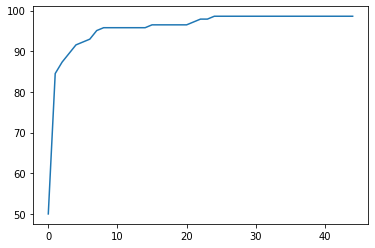

In [27]:
model = initialize_parameters(nn_input_dim=13, nn_hdim= 5, nn_output_dim= 3)
model = train(model,X_train,Y_train,learning_rate=0.07,iterations=4500,print_loss=True)
plt.plot(losses)


In [29]:
test = predict(model,X_test)
test = pd.get_dummies(test)
Y_test = pd.DataFrame(Y_test)
print("Testing accuracy is: ",str(accuracy_score(Y_test, test) * 100)+"%")


Testing accuracy is:  86.11111111111111%
